In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split

from sklearn.model_selection import cross_val_score

from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

from sklearn.ensemble import VotingClassifier
from mlxtend.classifier import StackingClassifier

basePre = pd.read_csv('./bases/base_pre.csv')
baseScaled = pd.read_csv('./bases/base_scaled.csv')
basePca70 = pd.read_csv('./bases/base_train_70.csv')

cv=5

#knn
n = 2

#mlp
solver = 'lbfgs'
alpha = 1e-5
hls = (15,)
rs = 1

#svm
gamma='scale'
kernel='linear'
c=1

#voting
nivel='hard'

Y = basePre['target']

#scaled
knn = KNeighborsClassifier(n_neighbors=n)
mlp = MLPClassifier(solver=solver, alpha=alpha, hidden_layer_sizes=hls, random_state=rs)

#pca70
naive = GaussianNB()
svm = SVC(gamma=gamma, kernel=kernel, C=c)

In [2]:
#5
clfScaled5 = StackingClassifier([mlp, knn]*2+[mlp], meta_classifier=mlp)
#10
clfScaled10 = StackingClassifier([mlp, knn]*5, meta_classifier=mlp)
#20
clfScaled20 = StackingClassifier([mlp, knn]*10, meta_classifier=mlp)
#30
clfScaled30 = StackingClassifier([mlp, knn]*15, meta_classifier=mlp)

rScaled5 = cross_val_score(clfScaled5, baseScaled, Y, cv=cv)
rScaled10 = cross_val_score(clfScaled10, baseScaled, Y, cv=cv)
rScaled20 = cross_val_score(clfScaled20, baseScaled, Y, cv=cv)
rScaled30 = cross_val_score(clfScaled30, baseScaled, Y, cv=cv)

dfAcc = np.array([[rScaled5.mean(), rScaled5.std()*2]])
dfAcc = np.append(dfAcc, [[rScaled10.mean(), rScaled10.std()*2]], axis=0)
dfAcc = np.append(dfAcc, [[rScaled20.mean(), rScaled20.std()*2]], axis=0)
dfAcc = np.append(dfAcc, [[rScaled30.mean(), rScaled30.std()*2]], axis=0)

dfAccScaled = pd.DataFrame(dfAcc, columns=['mean', 'std'], index=None)

dfAccScaled = (dfAccScaled*100).apply(np.floor)
dfAccScaled


,mean,std
0,78.0,7.0
1,78.0,7.0
2,78.0,7.0
3,78.0,7.0


In [3]:
#5
clfPca705 = StackingClassifier([svm, naive]*2+[svm], meta_classifier=svm)
#10
clfPca7010 = StackingClassifier([svm, naive]*5, meta_classifier=svm)
#20
clfPca7020 = StackingClassifier([svm, naive]*10, meta_classifier=svm)
#30
clfPca7030 = StackingClassifier([svm, naive]*15, meta_classifier=svm)

rPca705 = cross_val_score(clfPca705, basePca70, Y, cv=cv)
rPca7010 = cross_val_score(clfPca7010, basePca70, Y, cv=cv)
rPca7020 = cross_val_score(clfPca7020, basePca70, Y, cv=cv)
rPca7030 = cross_val_score(clfPca7030, basePca70, Y, cv=cv)

dfAcc = np.array([[rPca705.mean(), rPca705.std()*2]])
dfAcc = np.append(dfAcc, [[rPca7010.mean(), rPca7010.std()*2]], axis=0)
dfAcc = np.append(dfAcc, [[rPca7020.mean(), rPca7020.std()*2]], axis=0)
dfAcc = np.append(dfAcc, [[rPca7030.mean(), rPca7030.std()*2]], axis=0)

dfAccPca70 = pd.DataFrame(dfAcc, columns=['mean', 'std'], index=None)

dfAccPca70 = (dfAccPca70*100).apply(np.floor)
dfAccPca70

,mean,std
0,84.0,7.0
1,84.0,7.0
2,84.0,7.0
3,84.0,7.0


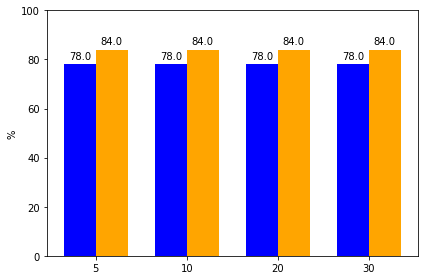

In [5]:
from plt import *
stacking(dfAcc1=dfAccScaled, dfAcc2=dfAccPca70, img='stacking.png')